<a href="https://colab.research.google.com/github/tewei0328/backtest/blob/main/2_1_%E8%B3%87%E6%96%99%E6%95%B4%E7%90%86_%E6%89%BE%E5%87%BA%E6%AF%8F%E5%B9%B4%E6%9C%80%E5%A4%A7%E5%80%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Remote Data Access
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
#colab內已巿裝有pandas_DataReader
https://ithelp.ithome.com.tw/articles/10205113

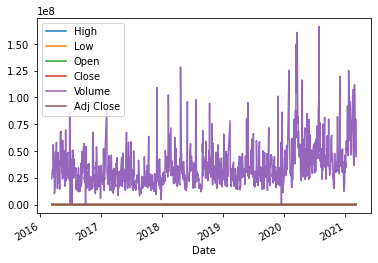

In [ ]:
import pandas_datareader as pdr
df_2330 = pdr.DataReader('2330.TW', 'yahoo')
df_2330.plot()

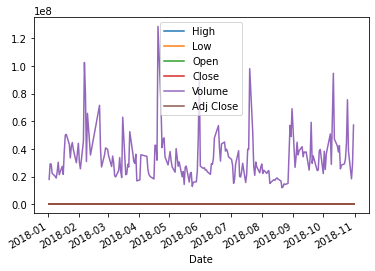

In [ ]:
startTime = '2018-1-01'
endTime = '2018-10-30'
df_2330 = pdr.DataReader('2330.TW', 'yahoo', startTime, endTime)
df_2330.plot()

In [ ]:
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,232.5,231.0,231.5,232.5,18055269.0,208.006409
2018-01-03,238.0,235.5,236.0,237.0,29308091.0,212.032349
2018-01-04,240.0,236.5,240.0,239.5,29096613.0,214.268967
2018-01-05,240.0,238.0,240.0,240.0,22438255.0,214.716293
2018-01-08,242.5,240.5,242.0,242.0,20233692.0,216.505615


In [ ]:
df_2330.describe()

,High,Low,Open,Close,Volume,Adj Close
count,203.000000,203.000000,203.000000,203.000000,2.030000e+02,203.000000
mean,241.704433,237.931034,239.997537,239.896552,3.381588e+07,218.145296
std,13.682533,13.401831,13.718663,13.604987,1.684425e+07,13.289143
min,214.500000,210.000000,211.000000,212.000000,1.201413e+07,196.578720
25%,230.000000,226.500000,228.500000,228.750000,2.316583e+07,205.387665
50%,242.500000,239.000000,241.500000,240.500000,2.971631e+07,218.742233
75%,250.750000,247.500000,249.250000,249.750000,3.959100e+07,227.209846
max,268.000000,262.500000,268.000000,266.000000,1.284521e+08,245.723434


#2.去除多餘欄位drop, axis=1

In [ ]:
df=df_2330.drop(['Volume','Adj Close'],axis=1)

In [ ]:
df.sample(5)

,High,Low,Open,Close
Date,,,,
2018-06-19,226.0,224.0,225.5,225.0
2018-03-09,251.0,248.5,250.0,250.5
2018-05-08,228.5,223.5,224.0,228.0
2018-03-05,243.0,240.5,242.5,241.5
2018-02-01,261.0,257.0,257.5,259.5


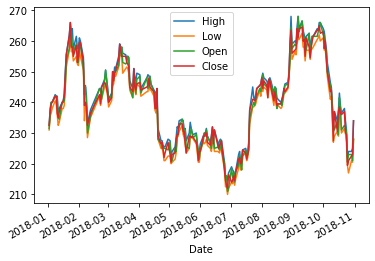

In [ ]:
df.plot()

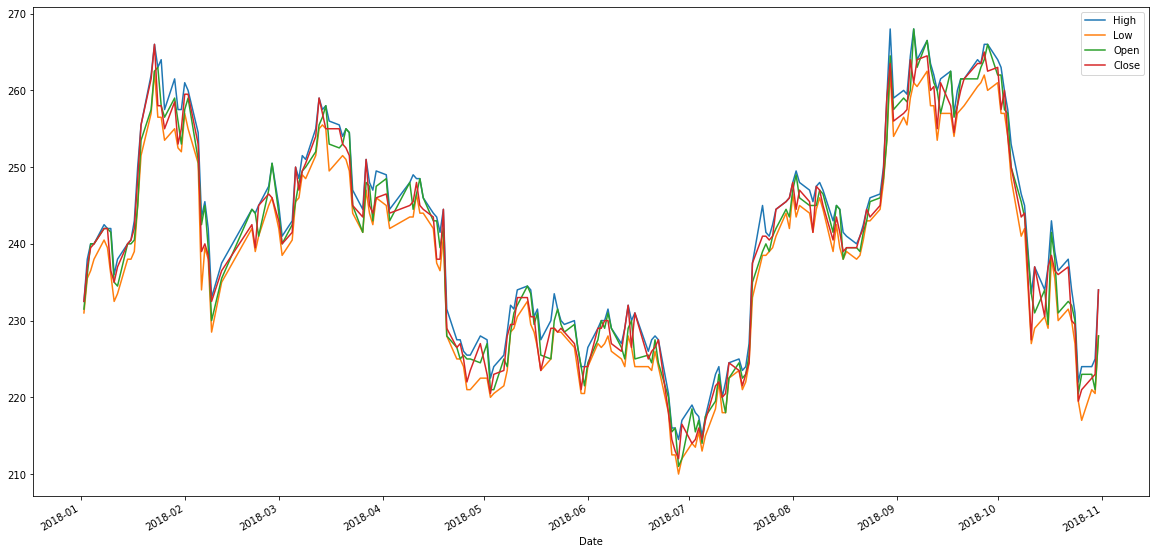

In [ ]:
df.plot(figsize=(20,10))

#3.取出所需欄位, 並建立新欄位
##【Trade 學院】—《Python程式交易~零基礎10小時快速上手 EP04》資料取得與處 20201102

https://youtu.be/T5eEctR591o?t=1073

##Pandas iloc說明


https://medium.com/@hupinwei/pandas-iloc%E8%AA%AA%E6%98%8E-dc6ebe212cd2

In [ ]:
df['ma_short']=df.iloc[:,3].rolling(5).mean()

In [ ]:
df.head(100)

,High,Low,Open,Close,ma_short
Date,,,,,
2018-01-02,232.5,231.0,231.5,232.5,NaN
2018-01-03,238.0,235.5,236.0,237.0,NaN
2018-01-04,240.0,236.5,240.0,239.5,NaN
2018-01-05,240.0,238.0,240.0,240.0,NaN
2018-01-08,242.5,240.5,242.0,242.0,238.2
...,...,...,...,...,...
2018-05-30,224.0,220.5,224.0,221.0,226.1
2018-05-31,224.0,220.5,221.5,224.0,225.1
2018-06-01,226.5,224.0,224.5,224.0,224.2


#4.存成csv檔
可方便下載到本機,並利用sqlite studio將資料轉成sqlite資料庫

In [ ]:
df.to_csv('aaa.csv')

#5.找出每月最大和最小值
https://stackoverflow.com/questions/45156289/pandas-where-is-the-documentation-for-timegrouper

In [ ]:
df.sample()

,High,Low,Open,Close,ma_short
Date,,,,,
2018-09-20,261.5,257.5,261.5,260.0,258.3


In [ ]:
import pandas as pd

In [ ]:
df.groupby(pd.Grouper(freq='M')).Close.max()

Date
2018-01-31    266.0
2018-02-28    259.5
2018-03-31    259.0
2018-04-30    248.0
2018-05-31    233.0
2018-06-30    232.0
2018-07-31    246.0
2018-08-31    263.5
2018-09-30    265.0
2018-10-31    263.0
Freq: M, Name: Close, dtype: float64

In [ ]:
df.groupby(pd.Grouper(freq='M')).Close.min()

Date
2018-01-31    232.5
2018-02-28    232.5
2018-03-31    240.0
2018-04-30    222.0
2018-05-31    220.5
2018-06-30    212.0
2018-07-31    214.0
2018-08-31    239.0
2018-09-30    254.5
2018-10-31    219.5
Freq: M, Name: Close, dtype: float64

#6.找出每年最大最小值

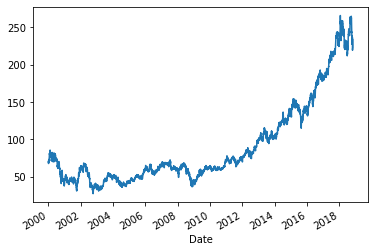

In [ ]:
startTime = '2000-1-01'
endTime = '2018-10-30'
df = pdr.DataReader('2330.TW', 'yahoo', startTime, endTime)
df.Close.plot()

In [ ]:
df.groupby(pd.Grouper(freq='Y')).Close.max()

Date
2000-12-31     85.691772
2001-12-31     62.405197
2002-12-31     68.365669
2003-12-31     55.148140
2004-12-31     52.834366
2005-12-31     61.114986
2006-12-31     66.888870
2007-12-31     72.272415
2008-12-31     68.708298
2009-12-31     65.000000
2010-12-31     72.900002
2011-12-31     78.000000
2012-12-31     99.199997
2013-12-31    115.500000
2014-12-31    141.500000
2015-12-31    154.500000
2016-12-31    193.000000
2017-12-31    244.000000
2018-12-31    266.000000
Freq: A-DEC, Name: Close, dtype: float64

##使用idxmax将得到最大价格的相应日期。
https://www.coder.work/article/2414505?fbclid=IwAR3OtwlOY06hKRzFzqde3B2iuZO-LoM-ezNG4l9MgPrcI6zGurZ7YQua1bw

In [ ]:
df.groupby(pd.Grouper(freq='Y')).Close.idxmax()

Date
2000-12-31   2000-02-11
2001-12-31   2001-12-06
2002-12-31   2002-03-11
2003-12-31   2003-09-17
2004-12-31   2004-01-27
2005-12-31   2005-12-23
2006-12-31   2006-12-06
2007-12-31   2007-07-13
2008-12-31   2008-05-19
2009-12-31   2009-10-01
2010-12-31   2010-12-17
2011-12-31   2011-01-19
2012-12-31   2012-12-13
2013-12-31   2013-05-14
2014-12-31   2014-11-28
2015-12-31   2015-02-25
2016-12-31   2016-10-25
2017-12-31   2017-11-07
2018-12-31   2018-01-23
Freq: A-DEC, Name: Close, dtype: datetime64[ns]

##我們可以使用 agg() 在列上應用求和運算。
https://www.delftstack.com/zh-tw/howto/python-pandas/how-to-get-the-aggregate-of-pandas-group-by-and-sum/

In [ ]:
import numpy as np

In [ ]:
df.groupby(pd.Grouper(freq='Y')).Close.agg({'max date': idxmax, 'max price': idxmax})

NameError: ignored

In [ ]:
df.groupby(pd.Grouper(freq='Y')).Close.min()

Date
2000-12-31     37.563667
2001-12-31     30.922014
2002-12-31     27.458433
2003-12-31     31.006157
2004-12-31     35.990391
2005-12-31     41.181454
2006-12-31     52.112244
2007-12-31     57.916939
2008-12-31     36.616917
2009-12-31     39.402985
2010-12-31     57.200001
2011-12-31     63.299999
2012-12-31     69.800003
2013-12-31     94.400002
2014-12-31    100.500000
2015-12-31    115.000000
2016-12-31    131.500000
2017-12-31    179.500000
2018-12-31    212.000000
Freq: A-DEC, Name: Close, dtype: float64